In [26]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import spearmanr

Combine the csv file of all clustered color profile and video metrics using the Video ID 

In [27]:
# Combine all cluster data and color profile percentage into one DataFrame
color_profile_data = pd.read_csv('Clustered_Color_Profile.csv')

# Load video engagement data
video_data = pd.read_csv('results_count_with_error.csv')

Get rid of the '.jpg' in the video ID in Clustered Color Profile

In [28]:
# Remove the .jpg extension from the VideoID in color_profile_data
color_profile_data['VideoID'] = color_profile_data['VideoID'].str.replace('.jpg', '')

# Check again after cleaning
print("\nCleaned Sample IDs from color_profile_data:")
print(color_profile_data['VideoID'].head())


Cleaned Sample IDs from color_profile_data:
0    2KMPO_X70aM
1    z4o7B7EqlyA
2    h5HvB2tun4Y
3    los0jDQ1JgQ
4    YZfG-QIjvt0
Name: VideoID, dtype: object


In [29]:
# Display the first few rows of both datasets
print("\nClustered Color Profile Data:")
print(color_profile_data.head())
print("\nNumber of rows and columns in text_data:", color_profile_data.shape)

print("\nVideo Engagement Data:")
print(video_data.head())
print("\nNumber of rows and columns in video_data:", video_data.shape)


Clustered Color Profile Data:
       VideoID  cluster  Yellow  Orange   Red  Violet  Blue  Green  Black  \
0  2KMPO_X70aM        8    0.00    1.24  0.00   19.83  0.00    0.0  20.11   
1  z4o7B7EqlyA        1    2.94   13.90  0.27   16.88  0.71    0.0  19.03   
2  h5HvB2tun4Y        7    0.21    0.26  0.00   14.37  0.00    4.6   9.05   
3  los0jDQ1JgQ        2    0.00    0.16  9.44   12.52  0.00    0.0  28.79   
4  YZfG-QIjvt0        8    0.15    8.64  0.00   18.59  0.50    0.0   4.08   

   White  Brown  
0  10.86  47.96  
1  20.03  26.24  
2  49.74  21.77  
3  23.97  25.12  
4   6.84  61.20  

Number of rows and columns in text_data: (2946, 11)

Video Engagement Data:
       VideoID  View Count  Like Count  Comment Count
0  lZXDClzL8m8     4885860       75940           3507
1  XsWKvutlu8I     3545247       55237           1656
2  stMSVi5wI8k     3824080       67281           2274
3  b7HQU_--Qdw      596295       10123            831
4  zDwuJgLNJbc     4322068       74383           47

In [30]:
# Merge datasets on 'Video ID'
merged_data = pd.merge(color_profile_data, video_data, on='VideoID', how='inner')

# Check the merged dataset
print("\nMerged Dataset:")
print(merged_data.head())

# Display the number of rows and columns
print("\nNumber of rows and columns:", merged_data.shape)


Merged Dataset:
       VideoID  cluster  Yellow  Orange   Red  Violet  Blue  Green  Black  \
0  2KMPO_X70aM        8    0.00    1.24  0.00   19.83  0.00    0.0  20.11   
1  z4o7B7EqlyA        1    2.94   13.90  0.27   16.88  0.71    0.0  19.03   
2  h5HvB2tun4Y        7    0.21    0.26  0.00   14.37  0.00    4.6   9.05   
3  los0jDQ1JgQ        2    0.00    0.16  9.44   12.52  0.00    0.0  28.79   
4  ChjJi3WLk4g        4    0.00    0.83  0.00   36.00  0.00    0.0  28.72   

   White  Brown  View Count  Like Count  Comment Count  
0  10.86  47.96       42832         864            129  
1  20.03  26.24       66954        3149            267  
2  49.74  21.77       25735        1263            190  
3  23.97  25.12        4613         177             11  
4  10.68  23.77       21976         420             24  

Number of rows and columns: (2448, 14)


In [31]:
# Select color profile columns and video metrics
color_columns = ['Yellow', 'Orange', 'Red', 'Violet', 'Blue', 'Green', 'Black', 'White', 'Brown']
metric_columns = ['View Count', 'Like Count', 'Comment Count']

## Pearson R Correlational 

In [32]:
# Compute correlation matrix
correlation_matrix = merged_data[color_columns + metric_columns].corr()

# Display correlation between color profiles and metrics
print(correlation_matrix.loc[metric_columns, color_columns])

                 Yellow    Orange       Red    Violet      Blue     Green  \
View Count    -0.029985  0.095554 -0.021257 -0.056596 -0.029146 -0.011908   
Like Count    -0.014765  0.023847 -0.013058 -0.052209 -0.021196 -0.006679   
Comment Count  0.009889  0.093496 -0.001815 -0.083011 -0.034395 -0.019238   

                  Black     White     Brown  
View Count     0.017048 -0.046580  0.041121  
Like Count     0.072657 -0.031730 -0.013718  
Comment Count  0.064118 -0.024576 -0.016066  


In [33]:
# Create an empty dictionary to store correlation matrices for each cluster
cluster_correlations = {}

# Iterate through each cluster
for cluster_id, cluster_data in merged_data.groupby('cluster'):
    # Compute the correlation matrix for the current cluster
    cluster_corr_matrix = cluster_data[color_columns + metric_columns].corr()
    
    # Extract the correlations between color profiles and video metrics
    cluster_color_metric_corr = cluster_corr_matrix.loc[metric_columns, color_columns]
    
    # Store the result in the dictionary
    cluster_correlations[cluster_id] = cluster_color_metric_corr

In [34]:
#Display cluster-level correlations
for cluster_id, corr_matrix in cluster_correlations.items():
    print(f"Cluster {cluster_id} Correlation Between Color Profiles and Video Metrics:")
    print(corr_matrix)
    print("\n")

Cluster 0 Correlation Between Color Profiles and Video Metrics:
                 Yellow    Orange       Red    Violet      Blue     Green  \
View Count    -0.047394 -0.005546 -0.031619 -0.102070 -0.035918 -0.026722   
Like Count    -0.030753  0.005243 -0.022662 -0.081513 -0.029332 -0.016144   
Comment Count -0.060307 -0.012065 -0.046311 -0.093569 -0.030673 -0.035262   

                  Black     White     Brown  
View Count     0.130731 -0.096374 -0.020017  
Like Count     0.109599 -0.072615 -0.030587  
Comment Count  0.132327 -0.085070 -0.032531  


Cluster 1 Correlation Between Color Profiles and Video Metrics:
                 Yellow    Orange       Red    Violet      Blue     Green  \
View Count    -0.144352  0.213114 -0.079816 -0.163996 -0.101658 -0.013438   
Like Count    -0.116228  0.199908 -0.080375 -0.110082 -0.119615  0.017208   
Comment Count -0.096258  0.121297 -0.115186 -0.108166 -0.124649  0.006553   

                  Black     White     Brown  
View Count     0.00592

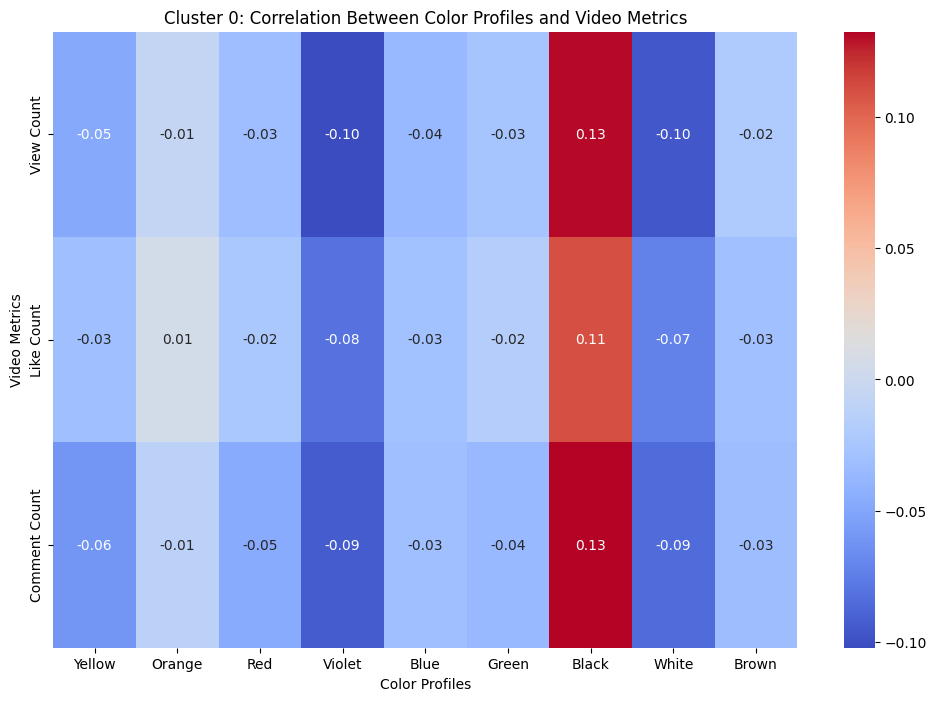

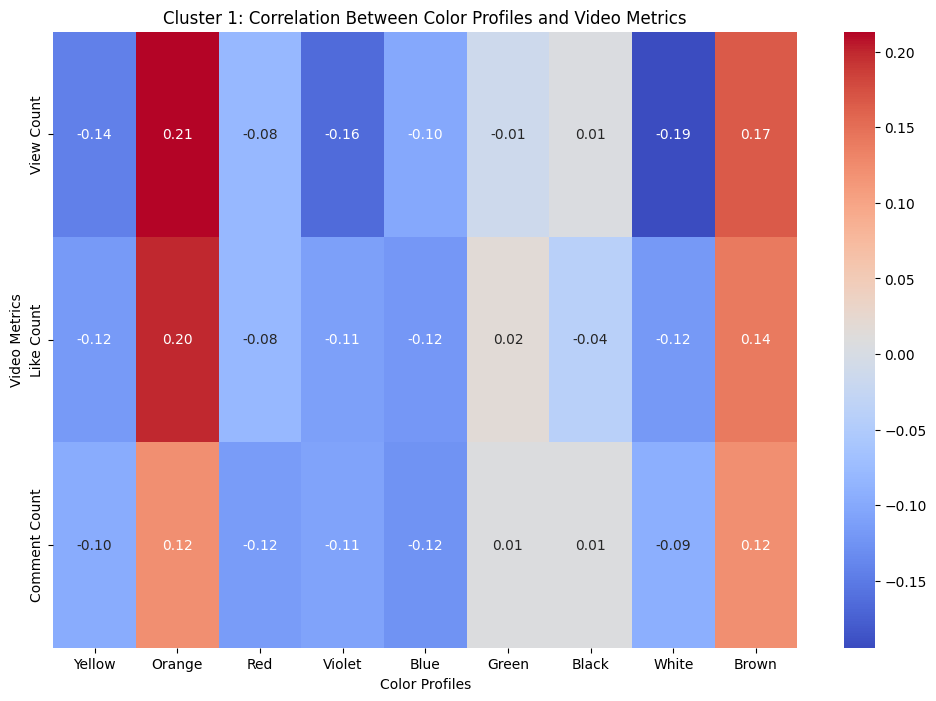

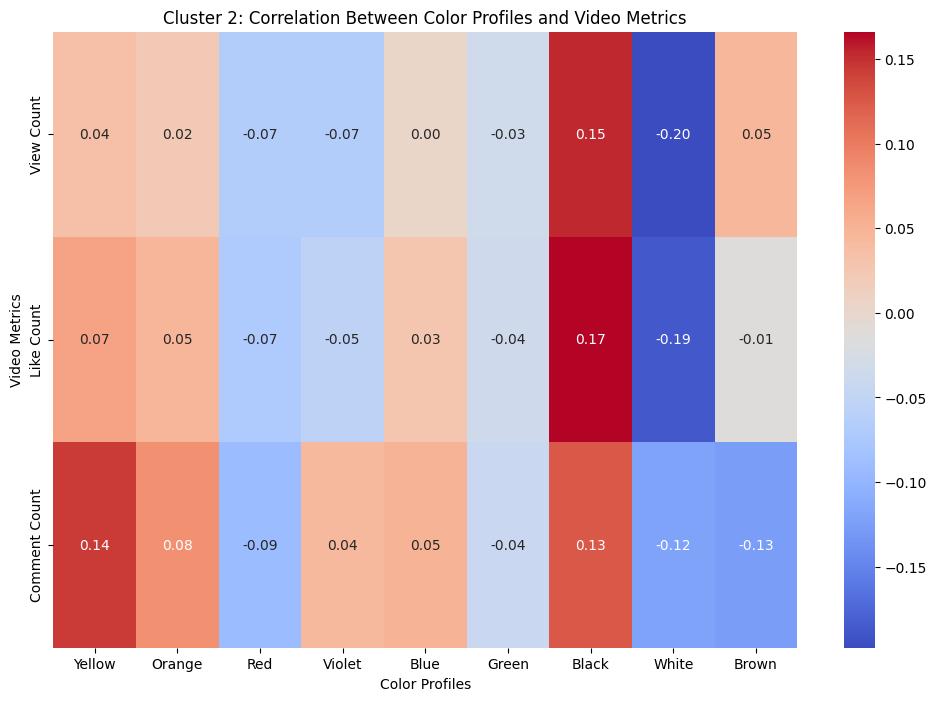

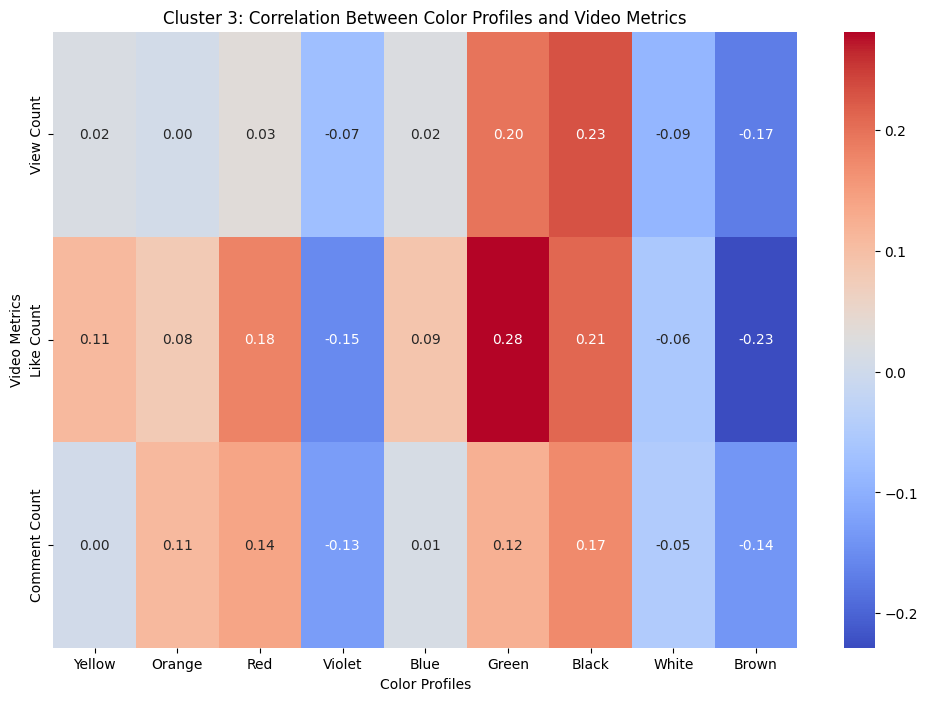

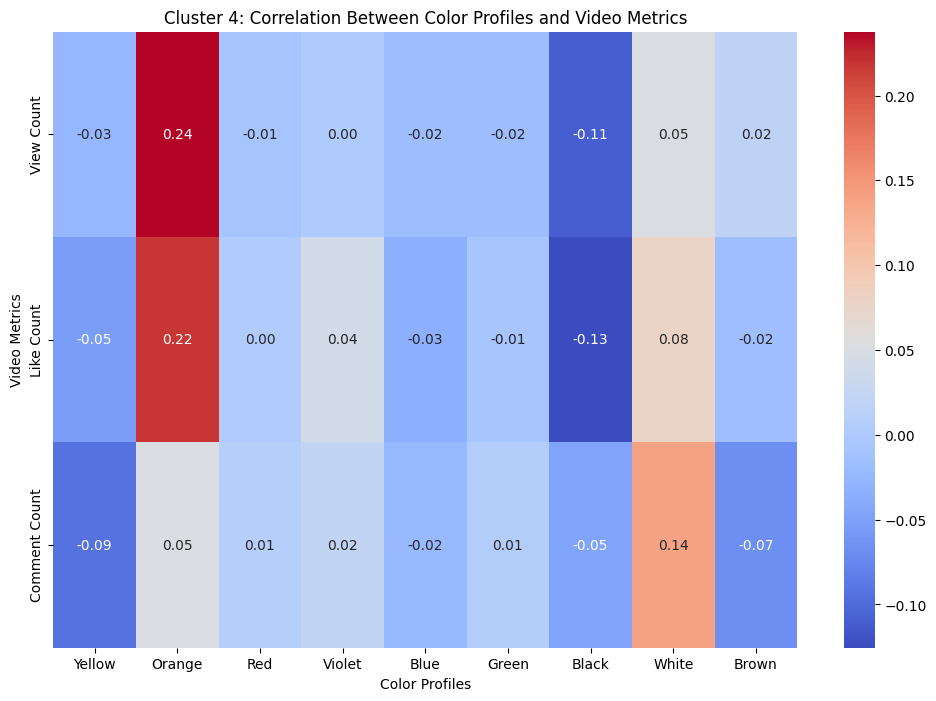

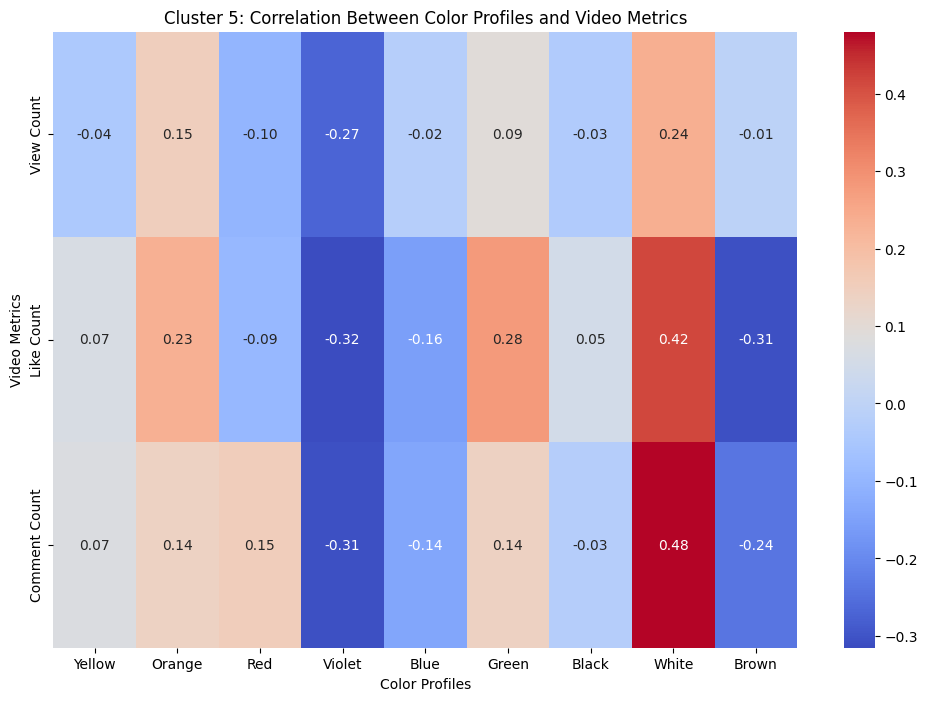

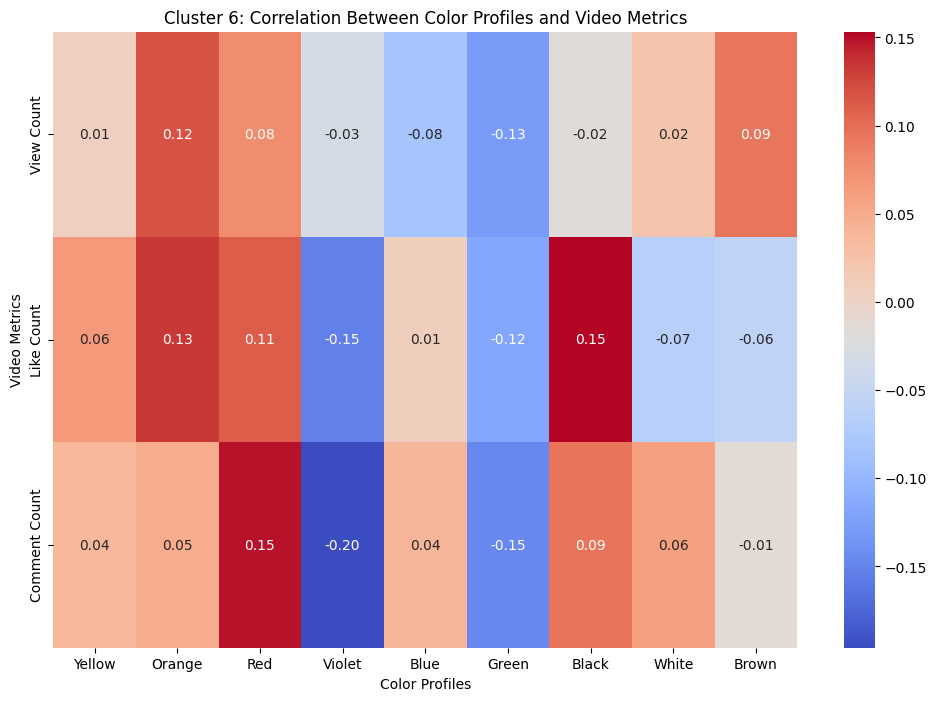

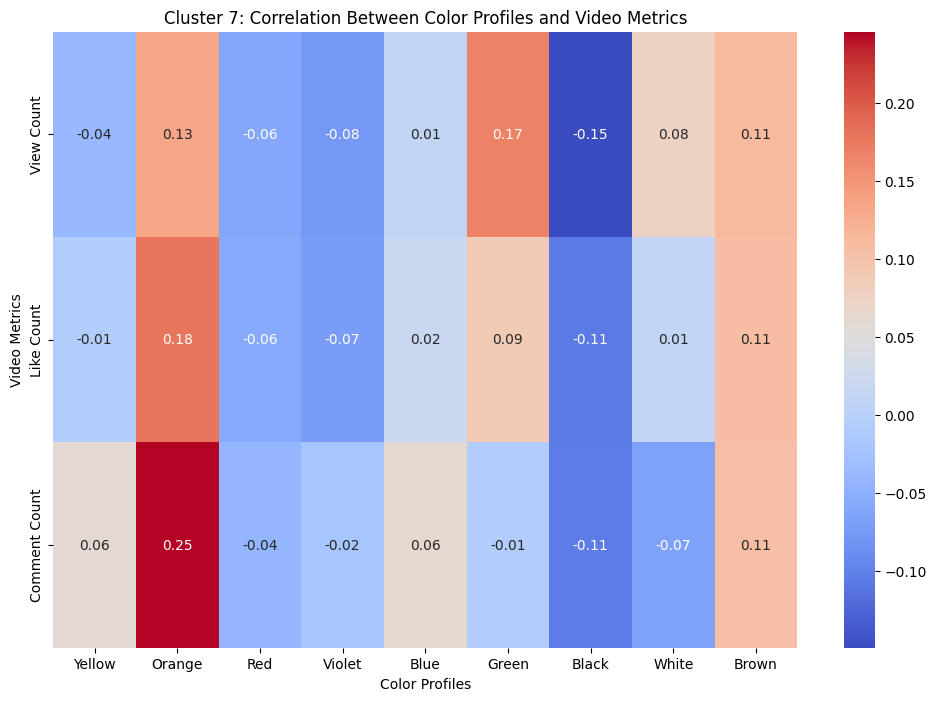

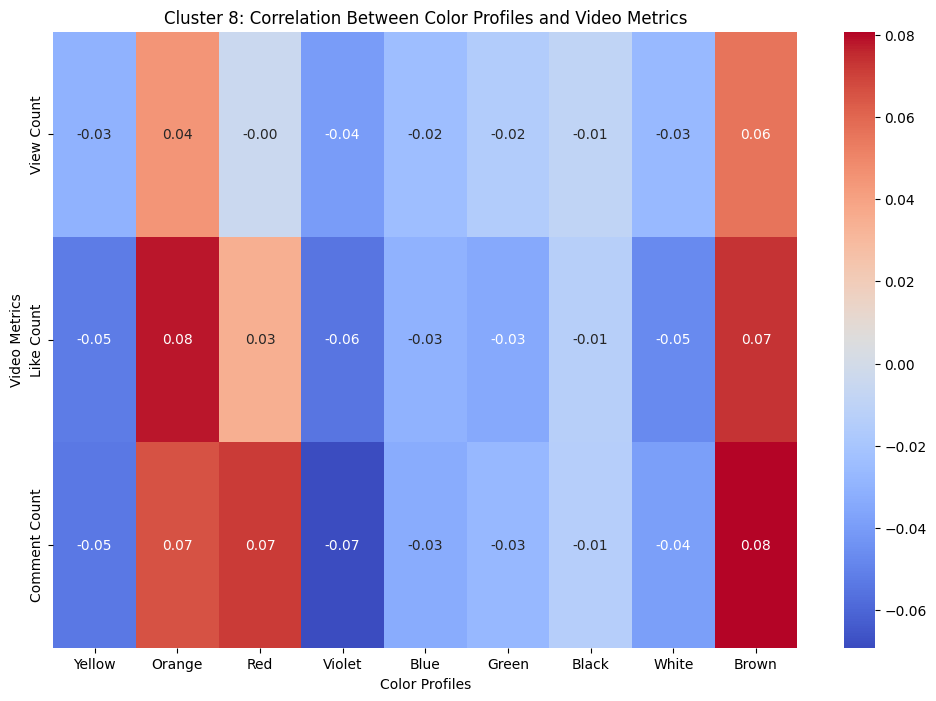

In [35]:
#Visualize cluster-level correlations
# Plot heatmaps for each cluster
for cluster_id, corr_matrix in cluster_correlations.items():
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
    plt.title(f'Cluster {cluster_id}: Correlation Between Color Profiles and Video Metrics')
    plt.xlabel('Color Profiles')
    plt.ylabel('Video Metrics')
    plt.show()

Visualization Using Line Plot

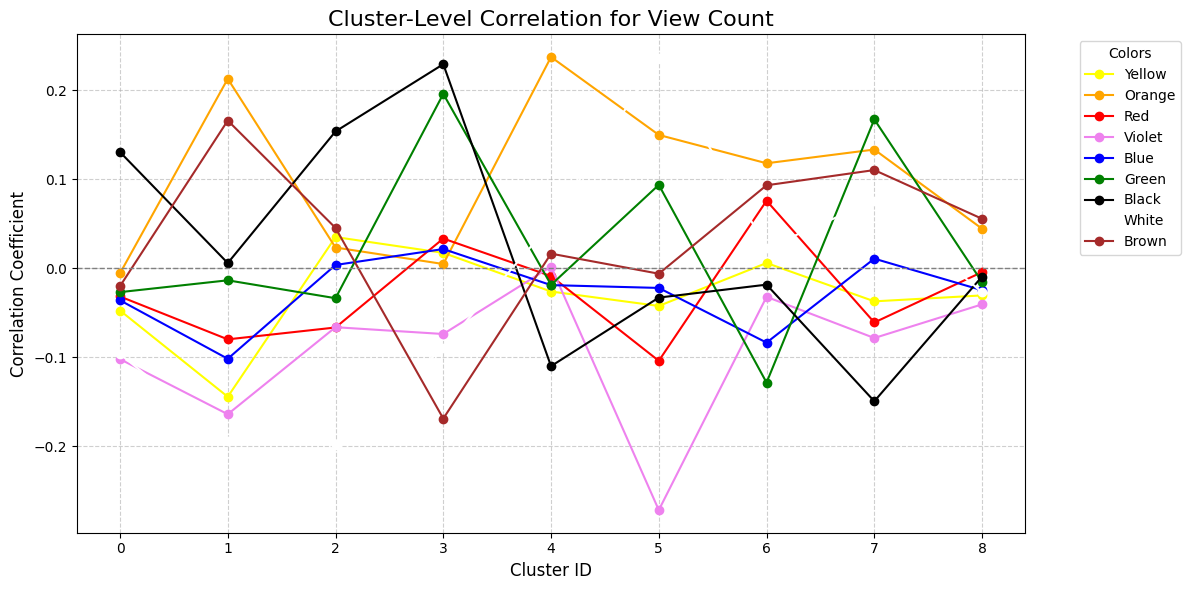

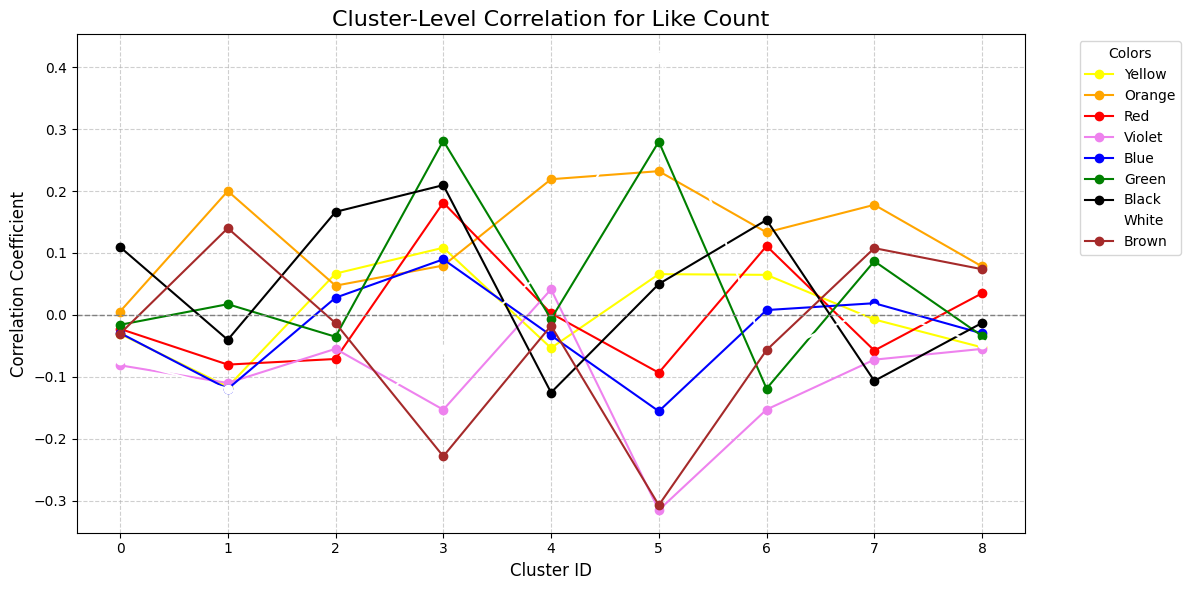

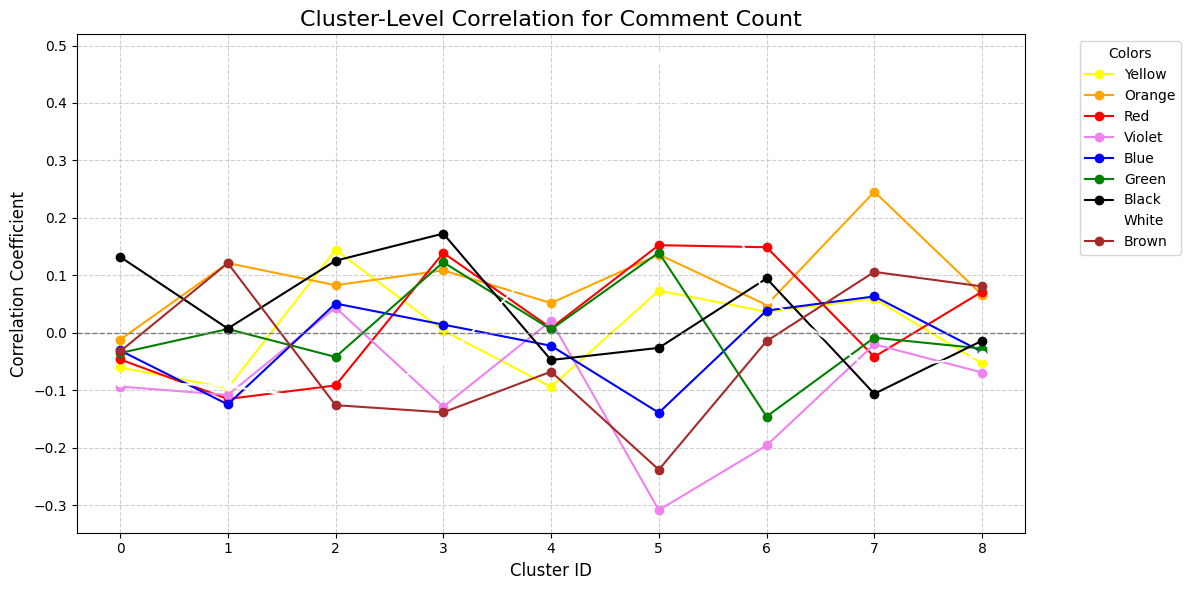

In [91]:
# Plot line charts for each metric
for metric in metric_columns:
    plt.figure(figsize=(12, 6))
    for color in color_columns:
        # Extract correlation values for the current color across all clusters
        corr_values = [cluster_correlations[cluster].loc[metric, color] for cluster in cluster_correlations]
        
        # Use the color name as the line color
        plt.plot(
            cluster_correlations.keys(), 
            corr_values, 
            label=color, 
            marker='o', 
            color=color.lower()  # Use the color name for the line color
        )
    
    # Add labels, title, and legend
    plt.title(f'Cluster-Level Correlation for {metric}', fontsize=16)
    plt.xlabel('Cluster ID', fontsize=12)
    plt.ylabel('Correlation Coefficient', fontsize=12)
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # Reference line at 0
    plt.legend(title='Colors', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

Add Statistical Significance (WIP)

In [92]:
# Create dictionary to store significant correlations
significant_correlations = {}

for cluster in cluster_correlations:
    cluster_data = merged_data[merged_data['cluster'] == cluster]
    sig_corr = pd.DataFrame(index=metric_columns, columns=color_columns)
    
    for metric in metric_columns:
        for color in color_columns:
            # Calculate correlation and p-value
            corr, p_value = pearsonr(cluster_data[color], cluster_data[metric])
            # Store only if significant (p < 0.05)
            sig_corr.loc[metric, color] = corr if p_value < 0.05 else None
            
    significant_correlations[cluster] = sig_corr

## Spearman Correlation

In [7]:
# Create dictionaries to store Spearman correlation coefficients and p-values
spearman_correlations = {}
spearman_p_values = {}

In [8]:
# Calculate Spearman correlations
for color in color_columns:
    spearman_correlations[color] = {}
    spearman_p_values[color] = {}
    
    for metric in metric_columns:
        corr, p_value = spearmanr(merged_data[color], merged_data[metric])
        spearman_correlations[color][metric] = corr
        spearman_p_values[color][metric] = p_value

In [9]:
# Create correlation matrices for visualization
corr_matrix = pd.DataFrame(index=color_columns, columns=metric_columns)
p_val_matrix = pd.DataFrame(index=color_columns, columns=metric_columns)

for color in color_columns:
    for metric in metric_columns:
        corr_matrix.loc[color, metric] = spearman_correlations[color][metric]
        p_val_matrix.loc[color, metric] = spearman_p_values[color][metric]

Cluster 0: 479 videos
Cluster 1: 363 videos
Cluster 2: 105 videos
Cluster 3: 155 videos
Cluster 4: 372 videos
Cluster 5: 50 videos
Cluster 6: 69 videos
Cluster 7: 341 videos
Cluster 8: 514 videos


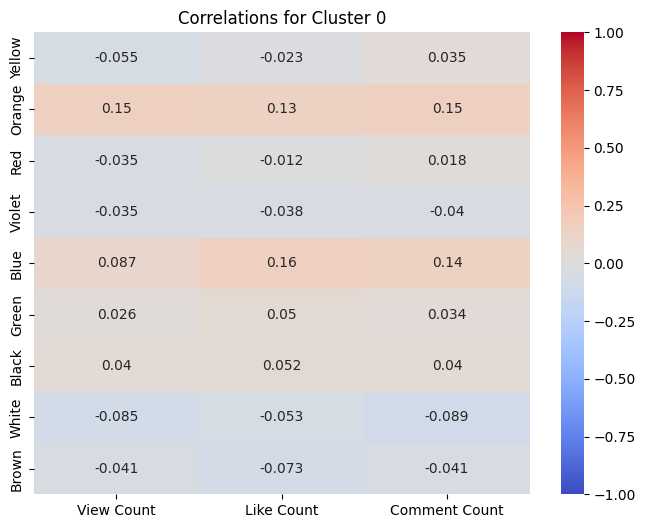

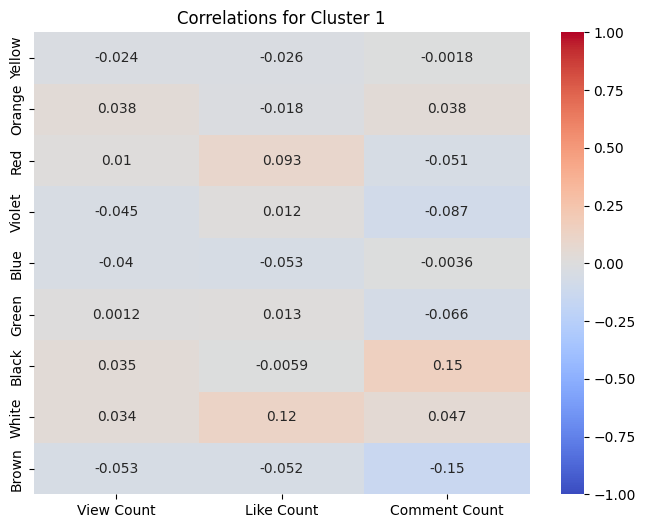

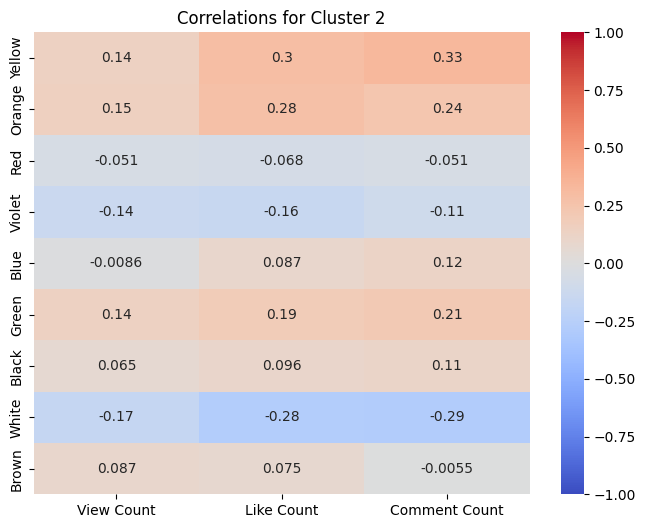

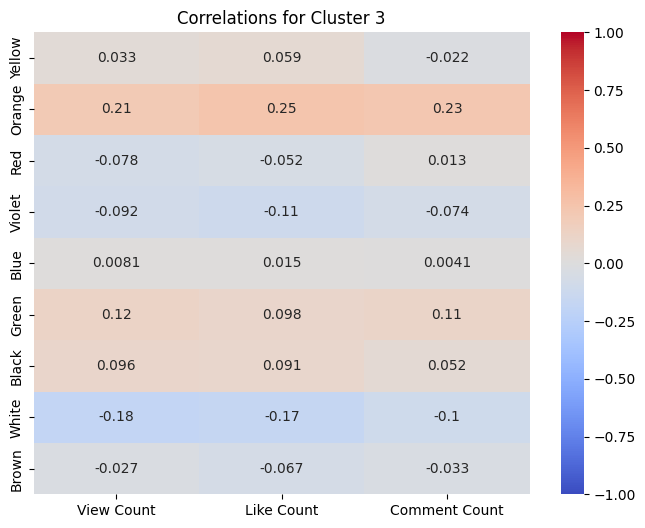

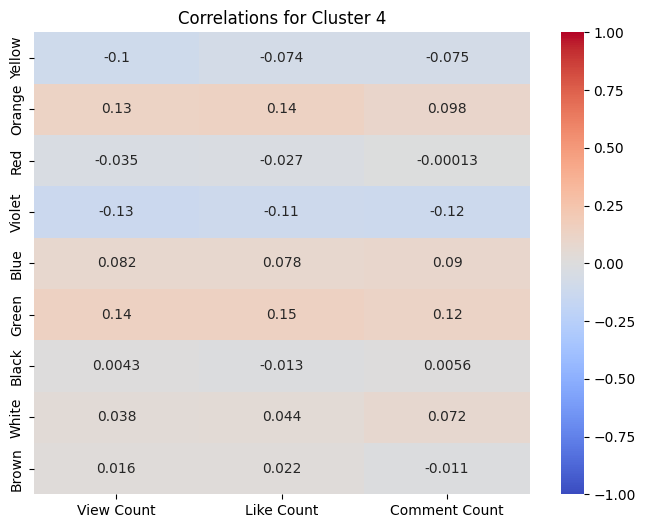

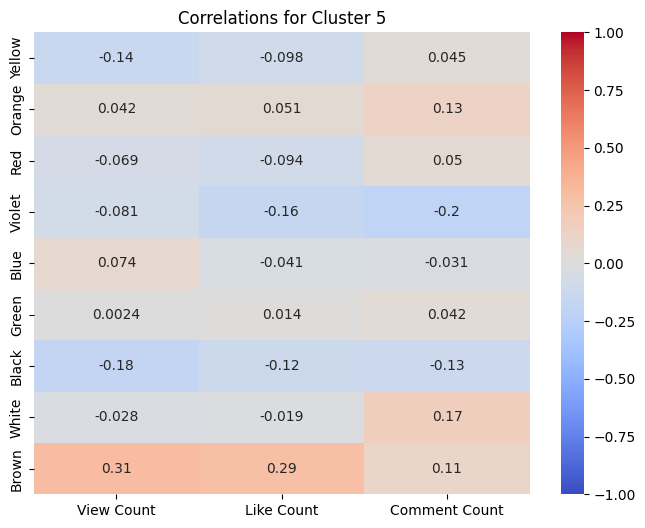

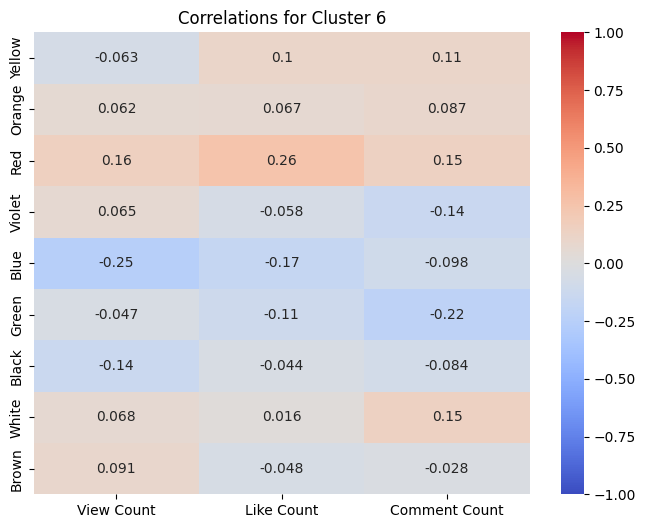

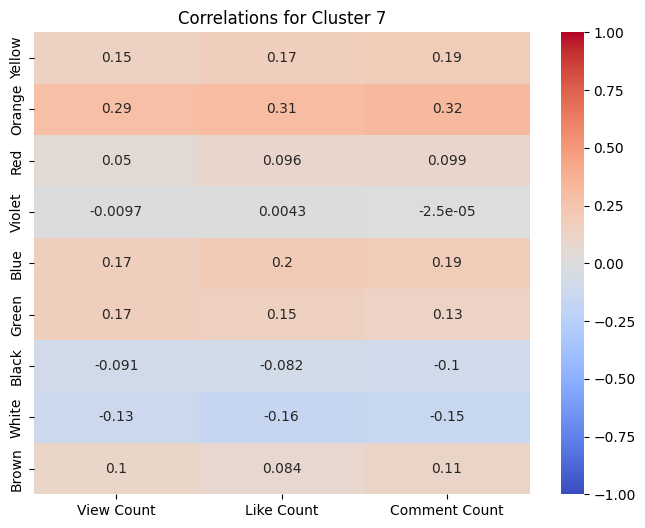

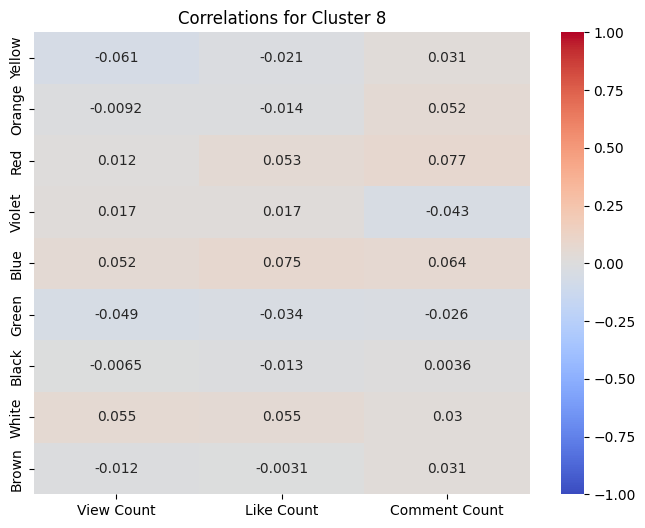

In [ ]:
# Analyze by cluster in numerical order
for cluster_num in sorted(merged_data['cluster'].unique()):
    cluster_data = merged_data[merged_data['cluster'] == cluster_num]
    
    # Calculate correlations for this cluster
    cluster_corr = pd.DataFrame(index=color_columns, columns=metric_columns)
    
    for color in color_columns:
        for metric in metric_columns:
            # Check if there's enough data to calculate correlation
            if len(cluster_data[color].dropna()) > 1 and len(cluster_data[metric].dropna()) > 1:
                corr, _ = spearmanr(cluster_data[color], cluster_data[metric], nan_policy='omit')
                cluster_corr.loc[color, metric] = corr
            else:
                cluster_corr.loc[color, metric] = np.nan
    
    # Make sure cluster_corr is numeric
    cluster_corr = cluster_corr.astype(float)
    
    # Handle NaN values for visualization
    cluster_corr_clean = cluster_corr.fillna(0)  # Replace NaN with 0 for visualization
    
    # Print cluster size information
    print(f"Cluster {cluster_num}: {len(cluster_data)} videos")
    
    # Visualize
    plt.figure(figsize=(8, 6))
    sns.heatmap(cluster_corr_clean, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlations for Cluster {cluster_num}')
    plt.tight_layout

## Point-Biserial Correlation 